# CMIP6 data

In [8]:
import sys
import gcsfs
import xarray as xr
import intake
import zarr
import pandas as pd
print(gcsfs.__version__)
print(xr.__version__)
print(intake.__version__)
print(zarr.__version__)

# this only needs to be created once
gcs = gcsfs.GCSFileSystem(token='anon')

# 
xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

0.7.1
0.16.1
0.6.0
2.6.1


In [2]:
df_full = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_full.sample(10)

/Users/gmaze/anaconda/envs/bluecloud/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
242830,DCPP,NCAR,CESM1-1-CAM5-CMIP5,dcppA-hindcast,r20i1p1f1,Amon,zg,gn,gs://cmip6/DCPP/NCAR/CESM1-1-CAM5-CMIP5/dcppA-...,1995.0,20191007
61881,CMIP,IPSL,IPSL-CM6A-LR,historical,r4i1p1f1,Amon,ts,gr,gs://cmip6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,NaN,20180803
360285,ScenarioMIP,MIROC,MIROC6,ssp245,r1i1p1f1,day,mrso,gn,gs://cmip6/ScenarioMIP/MIROC/MIROC6/ssp245/r1i...,NaN,20191016
66137,CMIP,MIROC,MIROC6,1pctCO2,r1i1p1f1,Amon,hur,gn,gs://cmip6/CMIP/MIROC/MIROC6/1pctCO2/r1i1p1f1/...,NaN,20190311
23362,CMIP,CCCma,CanESM5,historical,r12i1p1f1,day,huss,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r12i1...,NaN,20190429
186902,DCPP,MIROC,MIROC6,dcppA-hindcast,r7i1p1f1,Amon,tasmax,gn,gs://cmip6/DCPP/MIROC/MIROC6/dcppA-hindcast/s1...,1997.0,20190821
324949,ScenarioMIP,CNRM-CERFACS,CNRM-CM6-1,ssp126,r1i1p1f2,Eday,prw,gr,gs://cmip6/ScenarioMIP/CNRM-CERFACS/CNRM-CM6-1...,NaN,20190219
386473,ScenarioMIP,NCAR,CESM2,ssp245,r4i1p1f1,Omon,fgo2,gn,gs://cmip6/ScenarioMIP/NCAR/CESM2/ssp245/r4i1p...,NaN,20200528
227392,DCPP,NCAR,CESM1-1-CAM5-CMIP5,dcppA-hindcast,r40i1p1f1,Amon,zg,gn,gs://cmip6/DCPP/NCAR/CESM1-1-CAM5-CMIP5/dcppA-...,1982.0,20191007
200372,DCPP,NCAR,CESM1-1-CAM5-CMIP5,dcppA-hindcast,r11i1p1f1,Omon,sos,gn,gs://cmip6/DCPP/NCAR/CESM1-1-CAM5-CMIP5/dcppA-...,1961.0,20191016


In [24]:
# df = df_full.query("activity_id=='CMIP' & table_id == 'Omon' & variable_id == 'thetao' & experiment_id == 'historical' & member_id == 'r1i1p1f1'")
df = df_full.query("activity_id=='CMIP' & table_id == 'Omon' & institution_id == 'CNRM-CERFACS' & experiment_id == 'historical'")
# df = df_full.query('institution_id == "CNRM-CERFACS" & member_id=="r1i1p1f2" & source_id=="CNRM-CM6-1"')

# df = df_full.query("activity_id=='CMIP' & table_id == 'Omon' & variable_id == 'thetao' & experiment_id == 'abrupt-4xCO2'")

# df = df.query("source_id=='CNRM-CM6-1-HR' & variable_id=='thetao'") # Horizontal resolution up to 1/4 deg
# df = df.query("source_id=='CNRM-ESM2-1' & variable_id=='thetao'") # Horizontal resolution up to 1deg
df = df.query("source_id=='CNRM-ESM2-1' & (variable_id=='thetao' | variable_id=='so')") # Horizontal resolution up to 1deg

# df = df.sort_values('version')
df = df.sort_values('member_id')
df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
39040,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r10i1p1f2,Omon,thetao,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/histo...,NaN,20200117
39326,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,so,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/histo...,NaN,20181206
39335,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,thetao,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/histo...,NaN,20181206
39565,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Omon,so,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/histo...,NaN,20190125
39572,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Omon,thetao,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/histo...,NaN,20190125
39794,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,Omon,so,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/histo...,NaN,20190125
39801,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,Omon,thetao,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/histo...,NaN,20190125
39998,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,Omon,thetao,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/histo...,NaN,20190125
39992,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,Omon,so,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/histo...,NaN,20190125
40186,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Omon,so,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/histo...,NaN,20190125


In [22]:
def open_cmip6(df_row):
    # get the path to zarr store
    zstore = df.zstore.values[-1]
#     print(zstore)
    
    # create a mutable-mapping-style interface to the store
    mapper = gcs.get_mapper(zstore)

    # open it using xarray and zarr
    return xr.open_zarr(mapper, consolidated=True)

ds = open_cmip6(df.iloc[0])
print("Size of the dataset:", ds.nbytes/1e9,"Gb")
ds

Size of the dataset: 63.22679556 Gb


<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lev: 75, nvertex: 4, time: 1980, x: 362, y: 294)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * lev          (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    lev_bounds   (lev, axis_nbounds) float64 dask.array<chunksize=(75, 2), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
    time_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    thetao       (time, lev, y, x) float32 dask.array<chunksize=(4, 75, 294, 362), meta=np.ndarray>
Attributes:
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    Conventions:            CF-1.7 CMIP-6.2
    EXPID:                  CNRM-ESM2-1_historical_r9i1p1f2
    activity_id:            CMIP
    arpege_minor_version:   6.3.2
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  1096.0
    contact:                contact.cmip@meteo.fr
    creation_date:          2019-08-29T06:27:06Z
    data_specs_version:     01.00.21
    description:            CMIP6 historical
    dr2xml_md5sum:          92ddb3d0d8ce79f498d792fc8e559dcf
    dr2xml_version:         1.13
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacello volcello
    forcing_index:          2
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.CNRM-CERFACS...
    grid:                   native ocean tri-polar grid with 105 k ocean cells
    grid_label:             gn
    history:                none
    initialization_index:   1
    institution:            CNRM (Centre National de Recherches Meteorologiqu...
    institution_id:         CNRM-CERFACS
    license:                CMIP6 model data produced by CNRM-CERFACS is lice...
    mip_era:                CMIP6
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CNRM-ESM2-1
    parent_time_units:      days since 1850-01-01 00:00:00
    parent_variant_label:   r1i1p1f2
    physics_index:          1
    product:                model-output
    realization_index:      9
    realm:                  ocean
    references:             http://www.umr-cnrm.fr/cmip6/references
    source:                 CNRM-ESM2-1 (2017):  aerosol: TACTIC_v2 atmos: Ar...
    source_id:              CNRM-ESM2-1
    source_type:            AOGCM BGC AER CHEM
    status:                 2020-12-12;created; by gcs.cmip6.ldeo@gmail.com
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Omon
    title:                  CNRM-ESM2-1 model output prepared for CMIP6 / CMI...
    tracking_id:            hdl:21.14100/8e969929-c070-414d-9eca-f4c99b7be8b7...
    variable_id:            thetao
    variant_label:          r9i1p1f2
    xios_commit:            1442-shuffle

In [23]:
# Compute size of the df selection:
total_size = 0 # Gb
for index, row in df.iterrows():
    ds = open_cmip6(row)
    total_size += ds.nbytes/1e9
print("Size of the selection of datasets:", total_size, "Gb")    

Size of the selection of datasets: 1074.8555245200002 Gb


In [4]:
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df.zstore.values[-1]
print(zstore)

# create a mutable-mapping-style interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
print("Size of the dataset:", ds.nbytes/1e9,"Gb")

ds

gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r9i1p1f2/Omon/thetao/gn/
Size of the dataset: 63.22679556 Gb


<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lev: 75, nvertex: 4, time: 1980, x: 362, y: 294)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * lev          (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    lev_bounds   (lev, axis_nbounds) float64 dask.array<chunksize=(75, 2), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
    time_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    thetao       (time, lev, y, x) float32 dask.array<chunksize=(4, 75, 294, 362), meta=np.ndarray>
Attributes:
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    Conventions:            CF-1.7 CMIP-6.2
    EXPID:                  CNRM-ESM2-1_historical_r9i1p1f2
    activity_id:            CMIP
    arpege_minor_version:   6.3.2
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  1096.0
    contact:                contact.cmip@meteo.fr
    creation_date:          2019-08-29T06:27:06Z
    data_specs_version:     01.00.21
    description:            CMIP6 historical
    dr2xml_md5sum:          92ddb3d0d8ce79f498d792fc8e559dcf
    dr2xml_version:         1.13
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacello volcello
    forcing_index:          2
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.CNRM-CERFACS...
    grid:                   native ocean tri-polar grid with 105 k ocean cells
    grid_label:             gn
    history:                none
    initialization_index:   1
    institution:            CNRM (Centre National de Recherches Meteorologiqu...
    institution_id:         CNRM-CERFACS
    license:                CMIP6 model data produced by CNRM-CERFACS is lice...
    mip_era:                CMIP6
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CNRM-ESM2-1
    parent_time_units:      days since 1850-01-01 00:00:00
    parent_variant_label:   r1i1p1f2
    physics_index:          1
    product:                model-output
    realization_index:      9
    realm:                  ocean
    references:             http://www.umr-cnrm.fr/cmip6/references
    source:                 CNRM-ESM2-1 (2017):  aerosol: TACTIC_v2 atmos: Ar...
    source_id:              CNRM-ESM2-1
    source_type:            AOGCM BGC AER CHEM
    status:                 2020-12-12;created; by gcs.cmip6.ldeo@gmail.com
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Omon
    title:                  CNRM-ESM2-1 model output prepared for CMIP6 / CMI...
    tracking_id:            hdl:21.14100/8e969929-c070-414d-9eca-f4c99b7be8b7...
    variable_id:            thetao
    variant_label:          r9i1p1f2
    xios_commit:            1442-shuffle

In [5]:
sst = ds['thetao'].sel(lev=0, method='nearest')
sst

<xarray.DataArray 'thetao' (time: 1980, y: 294, x: 362)>
dask.array<getitem, shape=(1980, 294, 362), dtype=float32, chunksize=(4, 294, 362), chunktype=numpy.ndarray>
Coordinates:
    lat      (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lev      float64 0.5058
    lon      (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: y, x
Attributes:
    cell_measures:       area: areacello volume: volcello
    cell_methods:        area: mean where sea time: mean
    description:         Diagnostic should be contributed even for models usi...
    history:             none
    interval_operation:  1800 s
    interval_write:      1 month
    long_name:           Sea Water Potential Temperature
    online_operation:    average
    standard_name:       sea_water_potential_temperature
    units:               degC

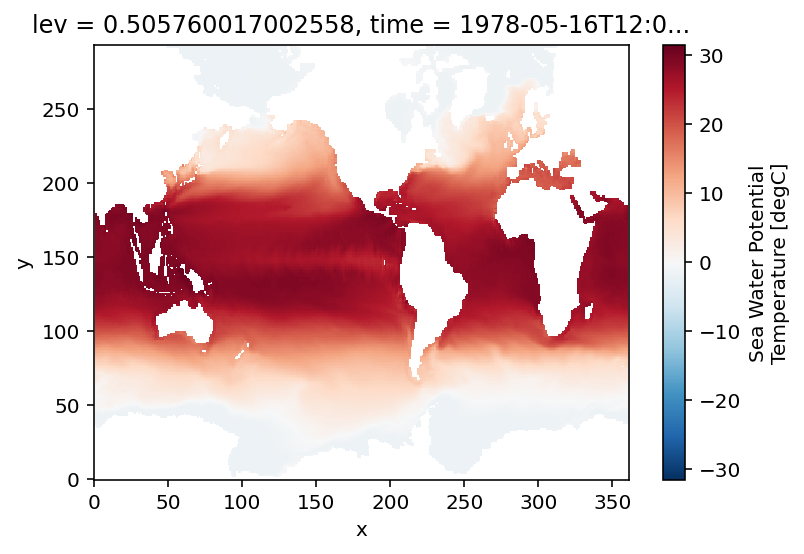

In [6]:
ds['thetao'].sel(lev=0, method='nearest').sel(time='1978-05-28T12:00:00', method='nearest').plot()

In [7]:
sst.where(lat>=23).where(lon>=)

SyntaxError: invalid syntax (<ipython-input-7-d0122a9eea18>, line 1)

## Horizontal resolution of the grid

In [ ]:
ds['lat'].isel(x=0).diff('y').plot()

In [ ]:
ds['lon'].isel(y=0).diff('x').plot()